In [1]:
import nltk

In [2]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

Downloader> download
Command 'download' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\DELL\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


**message = This part of the code creates a new list by iterating over each line in the file and applying the rstrip() method to remove trailing whitespace from each line.
The result is a list of strings, where each string represents a line from the file without any trailing whitespace.**

In [19]:
messages = [line.rstrip() for line in open('SMSSpamCollection.csv')] # list comprehension

In [20]:
print(len(messages))

5574


In [21]:
messages[100]

"ham\tPlease don't text me anymore. I have nothing else to say."

In [22]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [23]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## as there was tab separation to remove it we are reading csv with the help of csv

In [24]:
import pandas as pd

In [30]:
messages = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=['label', 'message']) # sep : separator

In [31]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [34]:
messages.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [35]:
messages['length'] = messages['message'].apply(len)

In [36]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

<Axes: ylabel='Frequency'>

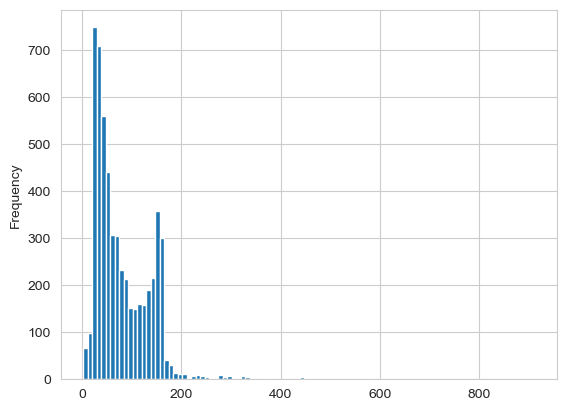

In [50]:
messages['length'].plot.hist(bins=100)

In [51]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [52]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

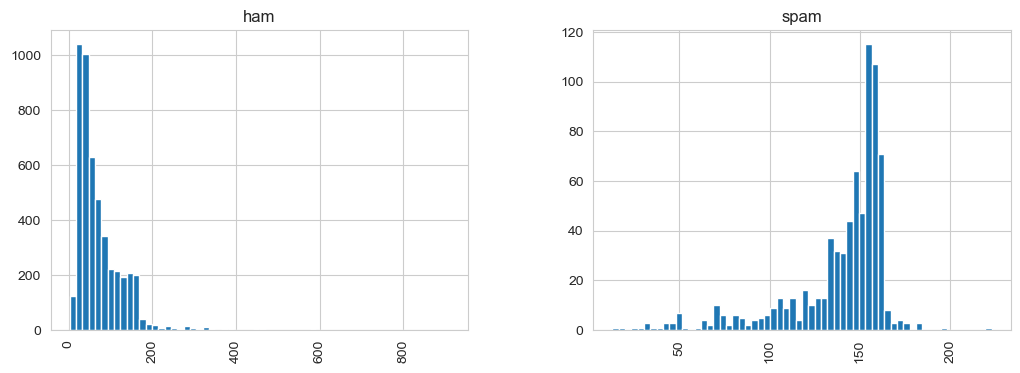

In [53]:
messages.hist(column='length', by='label', bins = 60, figsize=(12,4))

In [54]:
import string

In [55]:
mess = 'Sample message! Notice: it has punctuation.'

In [56]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
nopunc = [c for c in mess if c not in string.punctuation]

In [60]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [62]:
from nltk.corpus import stopwords

In [63]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [65]:
stopwords.words('nepali')

['छ',
 'र',
 'पनि',
 'छन्',
 'लागि',
 'भएको',
 'गरेको',
 'भने',
 'गर्न',
 'गर्ने',
 'हो',
 'तथा',
 'यो',
 'रहेको',
 'उनले',
 'थियो',
 'हुने',
 'गरेका',
 'थिए',
 'गर्दै',
 'तर',
 'नै',
 'को',
 'मा',
 'हुन्',
 'भन्ने',
 'हुन',
 'गरी',
 'त',
 'हुन्छ',
 'अब',
 'के',
 'रहेका',
 'गरेर',
 'छैन',
 'दिए',
 'भए',
 'यस',
 'ले',
 'गर्नु',
 'औं',
 'सो',
 'त्यो',
 'कि',
 'जुन',
 'यी',
 'का',
 'गरि',
 'ती',
 'न',
 'छु',
 'छौं',
 'लाई',
 'नि',
 'उप',
 'अक्सर',
 'आदि',
 'कसरी',
 'क्रमशः',
 'चाले',
 'अगाडी',
 'अझै',
 'अनुसार',
 'अन्तर्गत',
 'अन्य',
 'अन्यत्र',
 'अन्यथा',
 'अरु',
 'अरुलाई',
 'अर्को',
 'अर्थात',
 'अर्थात्',
 'अलग',
 'आए',
 'आजको',
 'ओठ',
 'आत्म',
 'आफू',
 'आफूलाई',
 'आफ्नै',
 'आफ्नो',
 'आयो',
 'उदाहरण',
 'उनको',
 'उहालाई',
 'एउटै',
 'एक',
 'एकदम',
 'कतै',
 'कम से कम',
 'कसै',
 'कसैले',
 'कहाँबाट',
 'कहिलेकाहीं',
 'का',
 'किन',
 'किनभने',
 'कुनै',
 'कुरा',
 'कृपया',
 'केही',
 'कोही',
 'गए',
 'गरौं',
 'गर्छ',
 'गर्छु',
 'गर्नुपर्छ',
 'गयौ',
 'गैर',
 'चार',
 'चाहनुहुन्छ',
 'चाहन्छु',
 'चाहिए

In [66]:
nopunc = ''.join(nopunc) # join the list of letter to form a sentence/words

In [67]:
nopunc

'Sample message Notice it has punctuation'

In [69]:
x = ['a', 'b', 'c', 'd']

In [70]:
''.join(x)

'abcd'

In [71]:
'***'.join(x)

'a***b***c***d'

In [76]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [77]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [79]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
# give the word from nopunc if lower version of that word doesn't belong to stop words of english

In [80]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [82]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [83]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# tokanizing messages 
**converting the messages into list of token**

In [84]:
messages['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [85]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# creating matrix

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message']) # bow : bag of word count

In [90]:
print(len(bow_transformer.vocabulary_)) # total no of words

11425


In [92]:
mess4 = messages['message'][3]

In [93]:
print(mess4)

U dun say so early hor... U c already then say...


In [94]:
bow4 = bow_transformer.transform([mess4])

In [96]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [97]:
print(bow4.shape)

(1, 11425)


In [100]:
bow_transformer.get_feature_names_out()[4068] # index of that word

#get_feature_names_out(): This method returns an array of the feature names in the same order as their indices.

'U'

In [101]:
bow_transformer.get_feature_names_out()[9554] # index of that word


'say'

In [102]:
messages_bow = bow_transformer.transform(messages['message'])

In [110]:
print(messages_bow[1])

  (0, 2451)	1
  (0, 3064)	1
  (0, 7701)	1
  (0, 8590)	1
  (0, 10698)	1
  (0, 11072)	1


In [112]:
print(messages_bow[0])

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1


In [103]:
print('Shpae of Sparse Matrix: ', messages_bow.shape)

Shpae of Sparse Matrix:  (5572, 11425)


In [104]:
messages_bow.nnz # total no of non-zero

50548

In [105]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity))) # gives basic idea how many 0 are there in matrix

sparsity: 0


## the term weight and normalization can be done by concept of tfidf

In [113]:
from sklearn.feature_extraction.text import TfidfTransformer

In [114]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [115]:
tfidf4 = tfidf_transformer.transform(bow4)

In [116]:
print(tfidf4) # now we have inverse document frequency and term frequency relationship

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [117]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [118]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [120]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [124]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [125]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [126]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [127]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## Now splitting the data into train test

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3) 

In [131]:
msg_train

1733                          K, can that happen tonight?
1384    Please reserve ticket on saturday eve from che...
4925    We can go 4 e normal pilates after our intro...  
1212    Ok then i will come to ur home after half an hour
5388             NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!
                              ...                        
2307                           Aight that'll work, thanks
2290    Had your mobile 11mths ? Update for FREE to Or...
3151          Yo! Howz u? girls never rang after india. L
61       Ha ha ha good joke. Girls are situation seekers.
3141    sexy sexy cum and text me im wet and warm and ...
Name: message, Length: 3900, dtype: object

## As messages are showing completely all the above process should be done. And, other way to do it by using python pipe-line feature

In [132]:
from sklearn.pipeline import Pipeline

In [141]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# we can also use other algorithm like RandomForestClassifier instead of MultinomialNB()

In [134]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001C37D36CA40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

**Now no need to do all the processes manually**

In [138]:
predictions = pipeline.predict(msg_test)

In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1446
        spam       1.00      0.71      0.83       226

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

